# Повторяю/Закрпеляю Pandas

In [42]:
import pandas as pd
import numpy as np

<b>Series</b>

In [3]:
data = pd.Series([3,5,2,3,5])
data

0    3
1    5
2    2
3    3
4    5
dtype: int64

In [4]:
data.values

array([3, 5, 2, 3, 5], dtype=int64)

In [8]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [10]:
data = pd.Series([3,5,2], index=['a','b','c'])
data

a    3
b    5
c    2
dtype: int64

In [11]:
data['c']

2

In [23]:
#Series из словаря python
population = {'Moscow':14000333,
              'Texas': 2663333,
              'New York': 754434,
              'Florida':234234}
popul_data = pd.Series(population)
popul_data

Moscow      14000333
Texas        2663333
New York      754434
Florida       234234
dtype: int64

In [66]:
popul_data.keys()

Index(['Moscow', 'Texas', 'New York', 'Florida'], dtype='object')

In [68]:
list(popul_data.items())

[('Moscow', 14000333),
 ('Texas', 2663333),
 ('New York', 754434),
 ('Florida', 234234)]

In [24]:
#срез по Series!!!
popul_data[:'New York']

Moscow      14000333
Texas        2663333
New York      754434
dtype: int64

In [70]:
popul_data['SPB'] = 7600999
popul_data

Moscow      14000333
Texas        2663333
New York      754434
Florida       234234
SPB          7600999
dtype: int64

Аргумент data может быть скаларным значением, которое будет повторено нужное количество раз для заоплнения заданного индекса:

In [22]:
pd.Series(5,index=['a','b','c'])

a    5
b    5
c    5
dtype: int64

<b>DataFrame</b>

In [25]:
#население
popul_data

Moscow      14000333
Texas        2663333
New York      754434
Florida       234234
dtype: int64

In [30]:
#площадь территории
area = pd.Series([243234,534345,23423,5434534], index=['Moscow','Texas','New York','Florida'])
area

Moscow       243234
Texas        534345
New York      23423
Florida     5434534
dtype: int64

df из словаря объектов series

In [71]:
#теперь создаем DataFrame, содержащий информацию о населении и площади
df = pd.DataFrame({'population':popul_data,
                  'area':area})
df

,population,area
Florida,234234,5434534.0
Moscow,14000333,243234.0
New York,754434,23423.0
SPB,7600999,NaN
Texas,2663333,534345.0


In [32]:
df.index

Index(['Moscow', 'Texas', 'New York', 'Florida'], dtype='object')

In [33]:
df.columns

Index(['population', 'area'], dtype='object')

df из одного объекта series

In [37]:
pd.DataFrame(popul_data, columns=['population'])

,population
Moscow,14000333
Texas,2663333
New York,754434
Florida,234234


df из списка словарей

In [39]:
pd.DataFrame({'a':i, 'b':2*i} for i in range(4))

,a,b
0,0,0
1,1,2
2,2,4
3,3,6


df из двумерного массива numpy

In [45]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo','bar'], index=['a','b','c'])

,foo,bar
a,0.857709,0.739718
b,0.829598,0.993020
c,0.397513,0.026100


<b>Index</b>

In [47]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [50]:
#immutable type
ind[0] = 3

TypeError: Index does not support mutable operations

Index как упорядоченное множество

In [51]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])

In [52]:
#пересечение
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [57]:
#объединение
indA | indB

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [63]:
#симметричная разность
indA ^ indB

Int64Index([1, 2, 9, 11], dtype='int64')

<b>Индексаторы loc, illoc, ix</b>

In [72]:
data = pd.Series(['a','b','c'], index=[1,3,5])
data

1    a
3    b
5    c
dtype: object

In [73]:
data[1] #использование явного индекса

'a'

In [80]:
data[1:3] #использование НЕявных индексов

3    b
5    c
dtype: object

In [81]:
data.loc[1] #использование явного индекса

'a'

In [82]:
data.iloc[1] #использование НЕявного индекса

'b'

In [83]:
data.iloc[1:3] #использование НЕявных индексов

3    b
5    c
dtype: object

<b>Вернемся к DataFrame</b>

In [87]:
df

,population,area
Florida,234234,5434534.0
Moscow,14000333,243234.0
New York,754434,23423.0
SPB,7600999,NaN
Texas,2663333,534345.0


In [88]:
df['density'] = df['population'] / df['area']
df

,population,area,density
Florida,234234,5434534.0,0.043101
Moscow,14000333,243234.0,57.559112
New York,754434,23423.0,32.209111
SPB,7600999,NaN,NaN
Texas,2663333,534345.0,4.984295


In [90]:
df.keys()

Index(['population', 'area', 'density'], dtype='object')

In [89]:
df.values

array([[2.34234000e+05, 5.43453400e+06, 4.31010276e-02],
       [1.40003330e+07, 2.43234000e+05, 5.75591118e+01],
       [7.54434000e+05, 2.34230000e+04, 3.22091107e+01],
       [7.60099900e+06,            nan,            nan],
       [2.66333300e+06, 5.34345000e+05, 4.98429479e+00]])

In [91]:
df.items()

<generator object DataFrame.iteritems at 0x00000235CA79F408>

In [101]:
list(df.items())

[('population', Florida       234234
Moscow      14000333
New York      754434
SPB          7600999
Texas        2663333
Name: population, dtype: int64), ('area', Florida     5434534.0
Moscow       243234.0
New York      23423.0
SPB               NaN
Texas        534345.0
Name: area, dtype: float64), ('density', Florida      0.043101
Moscow      57.559112
New York    32.209111
SPB               NaN
Texas        4.984295
Name: density, dtype: float64)]

In [102]:
df

,population,area,density
Florida,234234,5434534.0,0.043101
Moscow,14000333,243234.0,57.559112
New York,754434,23423.0,32.209111
SPB,7600999,NaN,NaN
Texas,2663333,534345.0,4.984295


In [103]:
df.loc['New York','population']

754434

In [104]:
df.iloc[2,0]

754434

In [110]:
df.iloc[:2,:2] *= -1

In [111]:
df

,population,area,density
Florida,-234234,-5434534.0,0.043101
Moscow,-14000333,-243234.0,57.559112
New York,754434,23423.0,32.209111
SPB,7600999,NaN,NaN
Texas,2663333,534345.0,4.984295


In [116]:
df.loc[df.population < 1000000, ['population']]

,population
Florida,-234234
Moscow,-14000333
New York,754434


Заполним NaN

In [167]:
M = pd.DataFrame(np.random.randint(0,10,(3,3)), columns=list('ABC'))
M

,A,B,C
0,6,4,7
1,9,2,5
2,0,6,6


In [168]:
M.stack()

0  A    6
   B    4
   C    7
1  A    9
   B    2
   C    5
2  A    0
   B    6
   C    6
dtype: int32

In [169]:
M.stack()[0]

A    6
B    4
C    7
dtype: int32

In [170]:
M.stack()[0].mean()

5.666666666666667

In [171]:
M.stack().mean()

5.0

In [172]:
M

,A,B,C
0,6,4,7
1,9,2,5
2,0,6,6


In [173]:
B = pd.DataFrame(np.random.randint(0,10,(2,2)), columns=list('AB'))
B

,A,B
0,9,8
1,8,3


In [174]:
M + B

,A,B,C
0,15.0,12.0,NaN
1,17.0,5.0,NaN
2,NaN,NaN,NaN


In [175]:
fill = M.stack().mean() #создаем заливку для NaN

M.add(B, fill_value=fill) #заливаем

,A,B,C
0,15.0,12.0,12.0
1,17.0,5.0,10.0
2,5.0,11.0,11.0


In [176]:
M

,A,B,C
0,6,4,7
1,9,2,5
2,0,6,6


Вычитание по столбцам

In [177]:
M = M.subtract(M['A'], axis=0)
M

,A,B,C
0,0,-2,1
1,0,-7,-4
2,0,6,6


<b>Отсутствующие данные None и NaN. Их обработка</b>

In [178]:
vals1 = np.array([1,None,3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [180]:
vals2 = np.array([1,np.nan,3,4])
vals2

array([ 1., nan,  3.,  4.])

NaN подобен вирусу: он заражает любой объект, с которым соприкасается так, что любая арифметическая операция станет равна NaN

In [181]:
1 + np.nan

nan

In [182]:
9 * np.nan

nan

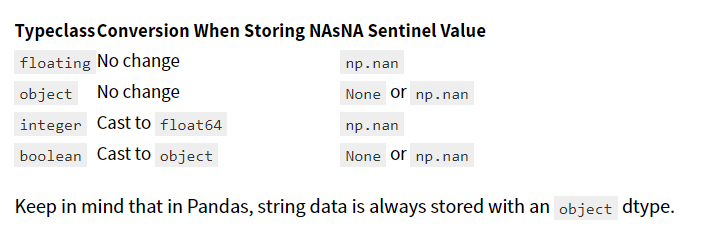

<b>Операции над пустыми значениями</b>

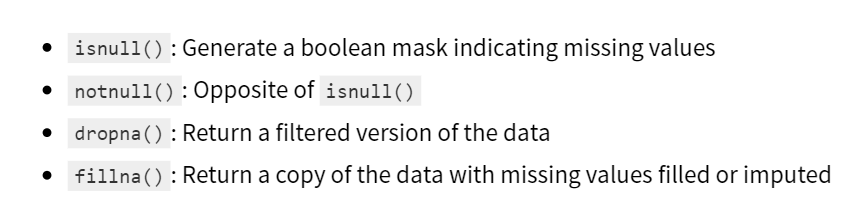

In [183]:
data = pd.Series([1, np.nan, 'hello', None])

In [184]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Маскирование

In [185]:
data[data.notnull()]

0        1
2    hello
dtype: object

Удаление пустых значений

In [186]:
data.dropna()

0        1
2    hello
dtype: object

In [189]:
#For a DataFrame, there are more options
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [190]:
#By default, dropna() will drop all rows in which any null value is present
df.dropna()

,0,1,2
1,2.0,3.0,5


In [191]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [192]:
df.dropna(axis='columns', how='all') #если все значения в каком-либо столбце равны NaN

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [193]:
df.iloc[0,0] = np.nan
df

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [195]:
df

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [204]:
df.dropna(axis='rows', thresh=2) #оставляет только те строки, в которых хотя бы 2 значения non-null

,0,1,2
1,2.0,3.0,5
2,NaN,4.0,6


Заполнение пустых значений

In [205]:
df

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [207]:
df.fillna(0)

,0,1,2
0,0.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


In [210]:
df.fillna(method='ffill') #forward-fill
#следующее значение заполняется предыдущим. 
#если предыдущего значения не было - настоящее останется NaN

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [211]:
df.fillna(method='bfill') #backward-fill

,0,1,2
0,2.0,3.0,2
1,2.0,3.0,5
2,NaN,4.0,6
